# View LUT with simulates spectra

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
lut_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lai-cab-ccc-car_lut.pkl"

In [5]:
df = pd.read_pickle(lut_path)
df

,n,cab,car,ant,cbrown,cw,cm,lai,lidfa,hspot,...,B05,B06,B07,B08,B8A,B09,B10,B11,B12,ccc
0,1.525949,3.526245e+01,10,2.254785,0.217770,0.027923,0.007656,3.440069,30.000887,0.257293,...,0.123627,0.403614,0.486510,0.507869,0.518731,0.504759,0.222720,0.178401,0.053253,1.213053e+00
1,1.614766,3.778391e+01,9,2.748406,0.587250,0.017422,0.000505,3.324955,51.624170,0.190404,...,0.084269,0.284552,0.376116,0.427579,0.457167,0.474538,0.249841,0.217763,0.093035,1.256298e+00
2,1.553382,5.428102e+01,20,1.554257,0.987613,0.050112,0.009975,7.177164,33.952204,0.043944,...,0.060543,0.230299,0.317106,0.374150,0.407634,0.412569,0.127764,0.095904,0.021550,3.895838e+00
3,1.523975,8.103753e+01,18,2.936296,0.950867,0.049036,0.000677,6.050304,51.715404,0.121249,...,0.038401,0.216683,0.340018,0.422609,0.473093,0.479919,0.124694,0.097902,0.024696,4.903017e+00
4,1.463316,5.268573e+01,12,2.293911,0.342971,0.054718,0.002095,7.763190,44.760326,0.150721,...,0.074111,0.357464,0.508917,0.564204,0.593468,0.534406,0.126235,0.097206,0.022784,4.090093e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.581333,1.556205e-200,1,1.911032,0.508570,0.024270,0.006763,0.010263,49.811411,0.094351,...,0.009875,0.011071,0.012128,0.013439,0.014211,0.016213,0.021376,0.023376,0.017677,1.597072e-204
49995,1.524701,3.836670e-07,1,1.739916,0.879107,0.034123,0.007219,0.084863,64.805526,0.413200,...,0.034323,0.037107,0.039766,0.042424,0.043967,0.046786,0.048218,0.048704,0.042470,3.255929e-10
49997,1.357730,8.497431e+01,23,1.380846,0.502727,0.044304,0.005499,6.655499,67.035387,0.271276,...,0.026664,0.187366,0.302358,0.348602,0.374646,0.359293,0.092812,0.071002,0.017288,5.655465e+00
49998,1.692399,3.343973e+01,12,1.580764,0.686930,0.031125,0.008784,1.940449,62.378757,0.441599,...,0.079144,0.186587,0.227940,0.253144,0.267360,0.277103,0.157488,0.137435,0.060600,6.488810e-01


In [6]:
df.columns

Index(['n', 'cab', 'car', 'ant', 'cbrown', 'cw', 'cm', 'lai', 'lidfa', 'hspot',
       'rsoil', 'psoil', 'lidfb', 'tts', 'tto', 'psi', 'typelidf', 'B01',
       'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10',
       'B11', 'B12', 'ccc'],
      dtype='object')

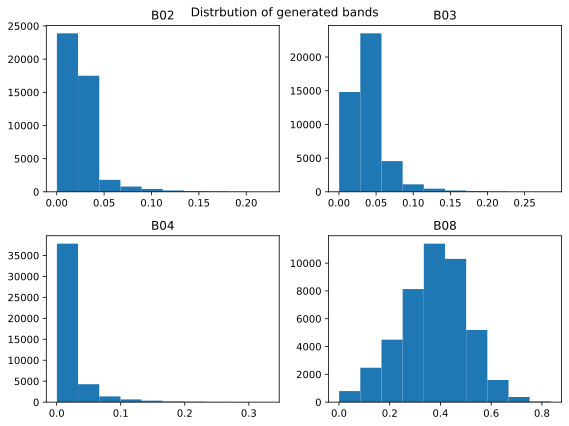

In [14]:
# Look at distrbution of bands (B2 blue, B3 freen, B4 red, B8 NIR)

columns_to_plot = ['B02', 'B03', 'B04', 'B08']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    df[col].hist(ax=axes[i], bins=10, grid=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("Distrbution of generated bands")
plt.show()

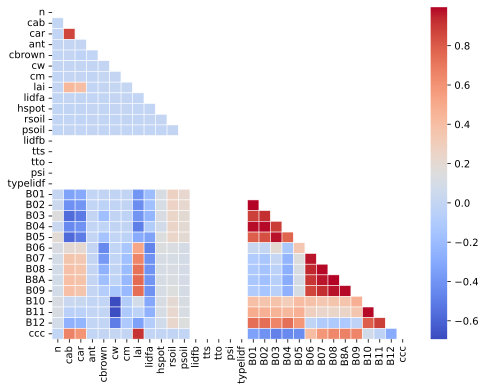

In [19]:
# Linear correclation between variables and bands

correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.show()

In [6]:
# Compare LAI to bands

columns_to_plot = ['B02', 'B03', 'B04', 'B08']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].scatter(df['n'], df[col])
    axes[i].set_title(f'{col} vs N')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('N')

plt.tight_layout()
plt.show()

# View saved spectra from S2

In [1]:
import rasterio

file_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/SRF_S2.tiff"

# Open the TIFF file
with rasterio.open(file_path) as src:
    # Read all bands
    bands = src.read()

    # Get the metadata
    metadata = src.meta

# Display information about the bands
print(f"Number of bands: {metadata['count']}")
print(f"Dimensions of each band: {bands.shape[1:]}")

Number of bands: 10
Dimensions of each band: (24, 74)


In [2]:
metadata

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': 0.0,
 'width': 74,
 'height': 24,
 'count': 10,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(10.0, 0.0, 492820.0,
        0.0, -10.0, 5258880.0)}

In [3]:
# Print the values of each band (you might want to adjust the print statement based on your data size)
for i in range(metadata['count']):
    print(f"\nBand {i + 1} values:")
    print(bands[i])


Band 1 values:
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.0328 0.0281 0.026 ]
 ...
 [0.     0.     0.0676 ... 0.     0.     0.    ]
 [0.     0.     0.0711 ... 0.     0.     0.    ]
 [0.     0.     0.0706 ... 0.     0.     0.    ]]

Band 2 values:
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.0572 0.0548 0.057 ]
 ...
 [0.     0.     0.0903 ... 0.     0.     0.    ]
 [0.     0.     0.093  ... 0.     0.     0.    ]
 [0.     0.     0.099  ... 0.     0.     0.    ]]

Band 3 values:
[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.0476 0.0416 0.0402]
 ...
 [0.     0.     0.1038 ... 0.     0.     0.    ]
 [0.     0.     0.1092 ... 0.     0.     0.    ]
 [0.     0.     0.1164 ... 0.     0.     0.    ]]

Band 4 values:
[[0.     0.     0.     ... 0.     0.

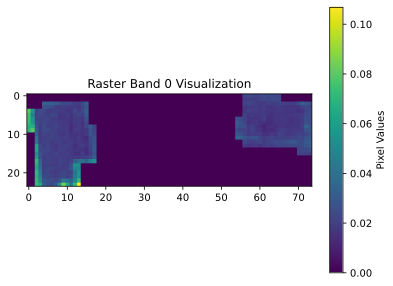

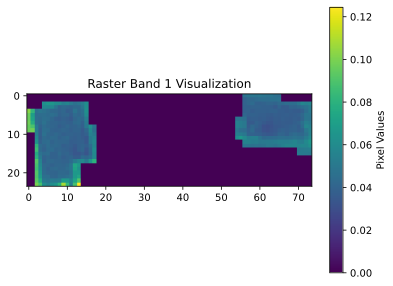

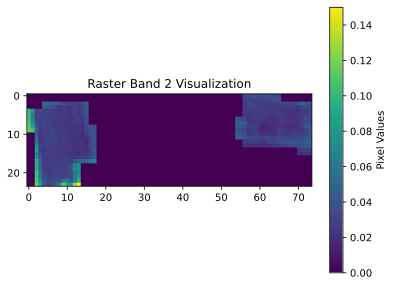

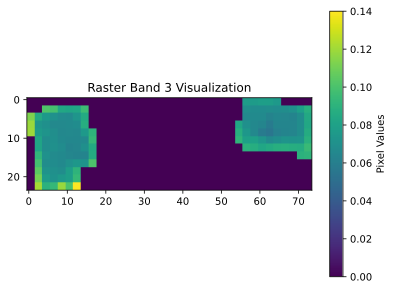

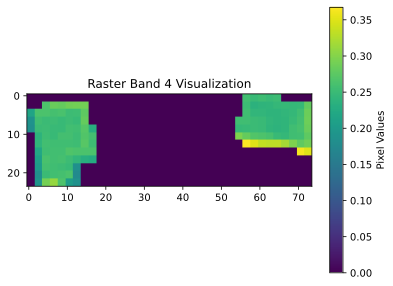

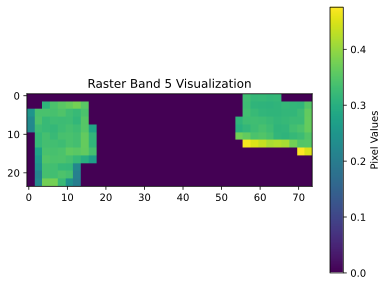

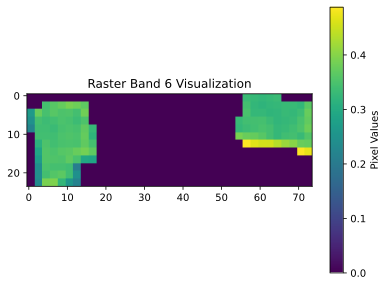

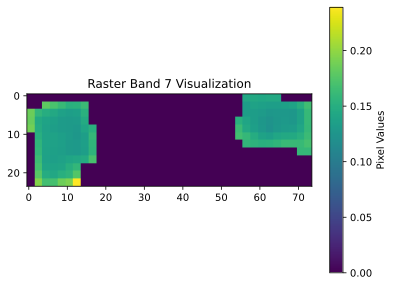

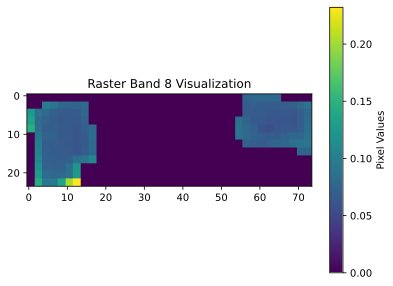

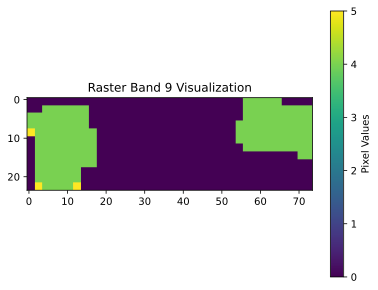

In [8]:
# Plot bands
import matplotlib.pyplot as plt

# Read the raster band (assuming it's a single-band raster)
with rasterio.open(file_path) as src:
  bands = src.read()

for i, b in enumerate(bands):
  # Plot the raster band
  plt.imshow(b, cmap='viridis')
  plt.colorbar(label='Pixel Values')
  plt.title(f'Raster Band {i} Visualization')
  plt.show()

# Close the raster file
src.close()


# View RTM inversion results

In [154]:
import rasterio

file_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lutinv_traits_noisy50.tiff"

# Open the TIFF file
with rasterio.open(file_path) as src:
    # Read all bands
    bands = src.read()

    # Get the metadata
    metadata = src.meta

# Display information about the bands
print(f"Number of bands: {metadata['count']}")
print(f"Dimensions of each band: {bands.shape[1:]}")

Number of bands: 9
Dimensions of each band: (24, 74)


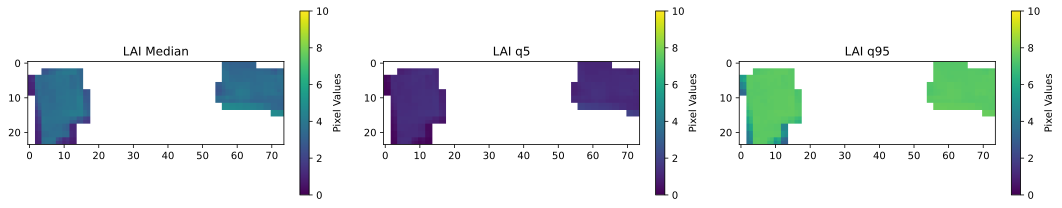

In [155]:
# Plot retrieved LAI
import matplotlib.pyplot as plt

with rasterio.open(file_path) as src:
  bands = src.read()

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
vmin = 0
vmax = 10

axs[0].imshow(bands[0], cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title('LAI Median')
axs[0].colorbar = plt.colorbar(axs[0].images[0], ax=axs[0], label='Pixel Values')

axs[1].imshow(bands[1], cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title('LAI q5')
axs[1].colorbar = plt.colorbar(axs[1].images[0], ax=axs[1], label='Pixel Values')

axs[2].imshow(bands[2], cmap='viridis', vmin=vmin, vmax=vmax)
axs[2].set_title('LAI q95')
axs[2].colorbar = plt.colorbar(axs[2].images[0], ax=axs[2], label='Pixel Values')

plt.tight_layout()
plt.show()

# Close the raster file
src.close()


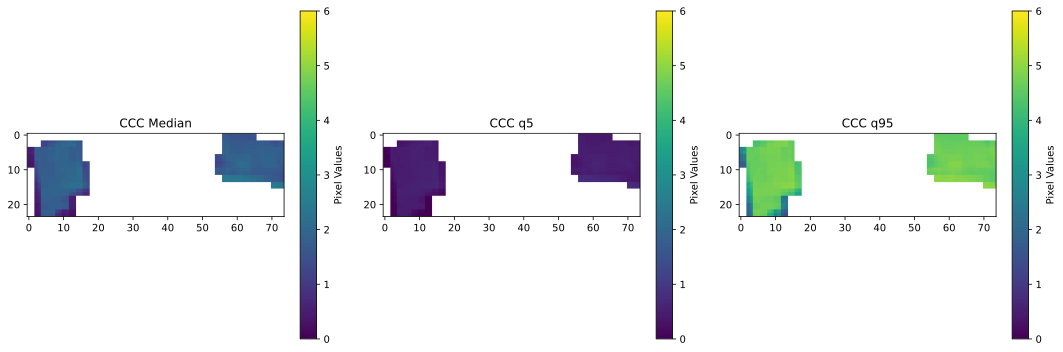

In [156]:
with rasterio.open(file_path) as src:
  bands = src.read()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
vmin = 0
vmax = 6

axs[0].imshow(bands[3], cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title('CCC Median')
axs[0].colorbar = plt.colorbar(axs[0].images[0], ax=axs[0], label='Pixel Values')

axs[1].imshow(bands[4], cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title('CCC q5')
axs[1].colorbar = plt.colorbar(axs[1].images[0], ax=axs[1], label='Pixel Values')

axs[2].imshow(bands[5], cmap='viridis', vmin=vmin, vmax=vmax)
axs[2].set_title('CCC q95')
axs[2].colorbar = plt.colorbar(axs[2].images[0], ax=axs[2], label='Pixel Values')

plt.tight_layout()
plt.show()

# Close the raster file
src.close()


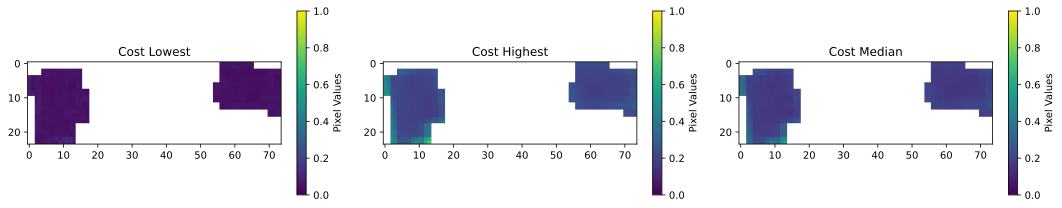

In [131]:
# Plot cost function
import matplotlib.pyplot as plt

with rasterio.open(file_path) as src:
  bands = src.read()

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
vmin = 0
vmax = 1

axs[0].imshow(bands[6], cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title('Cost Lowest')
axs[0].colorbar = plt.colorbar(axs[0].images[0], ax=axs[0], label='Pixel Values')

axs[1].imshow(bands[7], cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title('Cost Highest')
axs[1].colorbar = plt.colorbar(axs[1].images[0], ax=axs[1], label='Pixel Values')

axs[2].imshow(bands[8], cmap='viridis', vmin=vmin, vmax=vmax)
axs[2].set_title('Cost Median')
axs[2].colorbar = plt.colorbar(axs[2].images[0], ax=axs[2], label='Pixel Values')

plt.tight_layout()
plt.show()

# Close the raster file
src.close()

# Adding random noise to spectra to see how it affects inversion

In [123]:
lut_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lai-cab-ccc-car_lut.pkl"

with open(lut_path, 'rb') as f:
  df = pickle.load(f)
  

In [152]:
# Add noise to spectra

columns_to_add_noise = [col for col in df.columns if col.startswith('B')]
noise_percentage = 50

# Calculate the noise to be added based on the specified percentage
noise = np.random.uniform(low=-1, high=1, size=df[columns_to_add_noise].shape) * (noise_percentage / 100)

df_noisy = df.copy()
df_noisy[columns_to_add_noise] += df_noisy[columns_to_add_noise] * noise

# Clip values to ensure they remain in the valid range (0 to 1 for reflectance)
df_noisy = df_noisy.clip(0, 1)
df_noisy.loc[:, ~df_noisy.columns.isin(columns_to_add_noise)] = df.loc[:, ~df.columns.isin(columns_to_add_noise)]

In [127]:
# Save new lut pkl

lut_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lai-cab-ccc-car_lut.pkl"
noisy_lut_path = lut_path.split('.pkl')[0] + '_noisy.pkl'

with open(noisy_lut_path, 'wb') as f:
  pickle.dump(df_noisy, f)

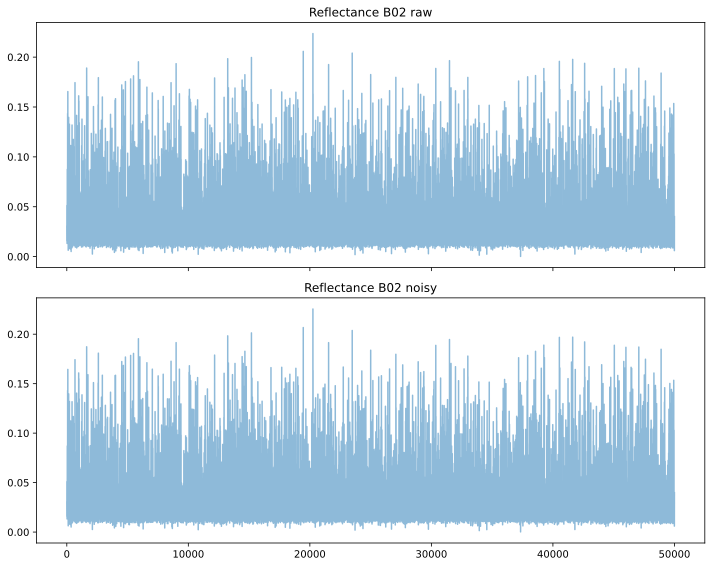

In [108]:
# Plot the original and noisy data
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axes[0].plot(df.index, df['B02'], label=f'Original {column}', alpha=0.5)
axes[0].set_title('Reflectance B02 raw')

axes[1].plot(df_noisy.index, df_noisy['B02'], label=f'Noisy {column}', alpha=0.5)
axes[1].set_title('Reflectance B02 noisy')

plt.tight_layout()
plt.show()


In [166]:
## Calculate mean LAI difference between LAI retrieved with and without noise

noise = [1,5,10,15,20,50]
original_path = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lutinv_traits.tiff"
noisy_root = "../results/lut_based_inversion/SwissFutureFarm_2019/S2A_MSIL2A_20190420T103031_R108_T32TMT_20201105T121331.SAFE/all_phases_lutinv_traits_noisy"

for n in noise:  
        noisy_path = noisy_root + f'{n}.tiff'
        with rasterio.open(original_path) as src1, rasterio.open(noisy_path) as src2:
                # Read raster data
                raster1 = src1.read(1)
                raster2 = src2.read(1)

                # Calculate difference
                diff = np.abs(raster1 - raster2)
                print(f'Mean LAI diff between orignal and noise {n}%: {np.nanmean(diff)}')

                percentage_change = ((raster2 - raster1) / raster1) * 100 # is pixel-wise here
                print(f'Mean percent change between orignal and noise {n}%: {np.nanmean(percentage_change)}\n')
        


Mean LAI diff between orignal and noise 1%: 0.00361843745961524
Mean percent change between orignal and noise 1%: 0.010698557407739112

Mean LAI diff between orignal and noise 5%: 0.016788384932484735
Mean percent change between orignal and noise 5%: 0.5667446030163328

Mean LAI diff between orignal and noise 10%: 0.06676988992013305
Mean percent change between orignal and noise 10%: 2.356610228556132

Mean LAI diff between orignal and noise 15%: 0.1349454864968899
Mean percent change between orignal and noise 15%: 4.789778175971008

Mean LAI diff between orignal and noise 20%: 0.2538437997336713
Mean percent change between orignal and noise 20%: 9.121747187076213

Mean LAI diff between orignal and noise 50%: 0.6918541953928175
Mean percent change between orignal and noise 50%: 26.249870193606707



In [163]:
percentage_change

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., 32.89501223,
        32.94092679, 32.60727271],
       ...,
       [        nan,         nan,  6.65575539, ...,         nan,
                nan,         nan],
       [        nan,         nan,  4.12375389, ...,         nan,
                nan,         nan],
       [        nan,         nan,  4.52964322, ...,         nan,
                nan,         nan]])

# Analyze data generated for ML training

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
lut_path = '../results/lut_based_inversion/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints.pkl'

In [4]:
df = pd.read_pickle(lut_path)
df

,n,cab,car,ant,cbrown,cw,cm,lai,lidfa,hspot,...,B05,B06,B07,B08,B8A,B09,B10,B11,B12,ccc
0,1.525949,41.850520,12,2.254785,0.217770,0.027923,0.007656,3.440069,30.000887,0.257293,...,0.112148,0.405743,0.498173,0.519694,0.530619,0.516445,0.230102,0.184682,0.055622,1.439687
1,1.614766,51.404261,12,2.748406,0.587250,0.017422,0.000505,3.324955,51.624170,0.190404,...,0.071578,0.290545,0.396422,0.448973,0.479125,0.496602,0.265069,0.231447,0.099697,1.709168
2,1.553382,46.924609,13,1.554257,0.987613,0.050112,0.009975,7.177164,33.952204,0.043944,...,0.069059,0.237404,0.321095,0.378413,0.412039,0.416957,0.129757,0.097464,0.021936,3.367856
3,1.523975,38.550388,10,2.936296,0.950867,0.049036,0.000677,6.050304,51.715404,0.121249,...,0.070331,0.237303,0.335498,0.417672,0.467942,0.474825,0.122189,0.095931,0.024243,2.332416
4,1.463316,50.515970,10,2.293911,0.342971,0.054718,0.002095,7.763190,44.760326,0.150721,...,0.083363,0.379172,0.530676,0.586657,0.616277,0.556087,0.135452,0.104587,0.024714,3.921650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.524701,0.210884,2,1.739916,0.879107,0.034123,0.007219,0.084863,64.805526,0.413200,...,0.034823,0.037753,0.040450,0.043133,0.044690,0.047529,0.048939,0.049410,0.043088,0.000179
49996,1.602137,45.351081,10,1.601871,0.183547,0.031539,0.005137,0.617822,50.208775,0.467681,...,0.044196,0.121063,0.137722,0.141680,0.143753,0.143606,0.091946,0.083795,0.037631,0.280189
49997,1.357730,70.589013,16,1.380846,0.502727,0.044304,0.005499,6.655499,67.035387,0.271276,...,0.033425,0.201730,0.309225,0.355532,0.381607,0.366071,0.095864,0.073313,0.017692,4.698051
49998,1.692399,70.302058,16,1.580764,0.686930,0.031125,0.008784,1.940449,62.378757,0.441599,...,0.056342,0.175209,0.227573,0.252196,0.266083,0.276507,0.165225,0.146652,0.069176,1.364176


In [5]:
df.columns

Index(['n', 'cab', 'car', 'ant', 'cbrown', 'cw', 'cm', 'lai', 'lidfa', 'hspot',
       'rsoil', 'psoil', 'tts', 'tto', 'psi', 'lidfb', 'typelidf', 'B01',
       'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10',
       'B11', 'B12', 'ccc'],
      dtype='object')

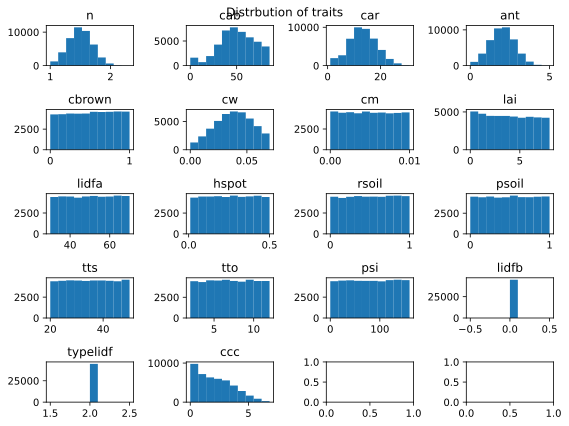

In [7]:
# Look at distrbution leaf/canopy traits

columns_to_plot = ['n', 'cab', 'car', 'ant', 'cbrown', 'cw', 'cm', 'lai', 'lidfa',
 'hspot', 'rsoil', 'psoil', 'tts', 'tto', 'psi', 'lidfb', 'typelidf', 'ccc']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    df[col].hist(ax=axes[i], bins=10, grid=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("Distrbution of traits")
plt.show()

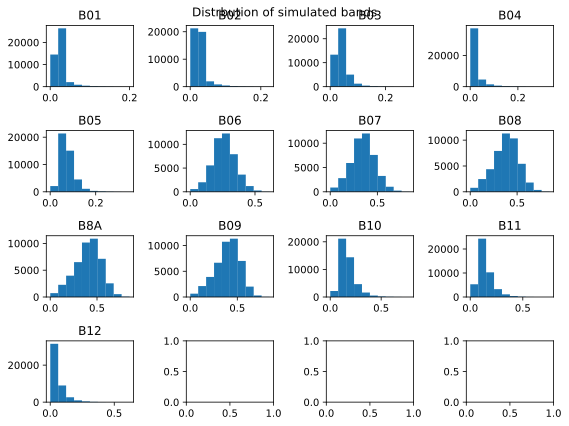

In [13]:
# Look at distrbution generated bands

columns_to_plot = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08',
 'B8A', 'B09', 'B10', 'B11', 'B12']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    df[col].hist(ax=axes[i], bins=10, grid=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("Distrbution of simulated bands")
plt.show()